# **Darwin's Finches Classification with a Multi-Layer Perceptron (MLP)**

#### **Context**
For the past 40-plus years (from 1973 to 2013), Peter and Rosemary Grant visited the Galápagos island of Daphne Major and collected data on Darwin's finches, to study Darwin's theory of evolution.

The Grant's spend years observing, tagging, and measuring Darwin's finches and their environment. During that time they documented environmental changes and how these changes favored certain individuals within the population, illustrating natural selection in action.

The dataset focuses on finches beak dimension. For the finches, the size and shape of their beaks are traits that vary to adapt the environmental changes. The relationship between beak size and ecological events which has been somewhat popularised as being an example of ‘evolution occurring before our eyes’.

#### **Content**
The dataset consist of 2 files:

- Finch Beak 1975: The beak measurement of the finches recorded in 1975.
- Finch Beak 2012: The beak measurement of the finches recorded in 2012.

Darwin's finches (also known as the Galápagos finches) are a group of about 15 species of passerine birds.They are well known for their remarkable diversity in beak form and function. They are often classified as the subfamily Geospizinae or tribe Geospizini. They belong to the tanager family and are not closely related to the true finches. The closest known relative of the Galápagos finches is the South American Tiaris obscurus. They were first collected by Charles Darwin on the Galápagos Islands during the second voyage of the Beagle. Apart from the Cocos finch, which is from Cocos Island, the others are found only on the Galápagos Islands.

<div style="text-align: center;">
  <img src="https://www2.nau.edu/lrm22/lessons/bird_lab/finches.gif" alt="Darwin Finches" style="width: 60%; height: auto;">
</div>


<img src="https://www.mun.ca/biology/scarr/Geospiza_beaks.jpg" alt="Beaks" style="width: 100%; height: auto;">

This diagram presents 10 species of finch on the Galapagos Islands, each filling a different niche on various islands. All of the finch species evolved from one ancestral species, which colonized the islands only a few million years ago. This process, whereby species evolve rapidly to exploit empty ecological space, is known as adaptive radiation.

#### **Objective**

The objective of this Jupyter notebook is to develop a predictive model that classifies the species of Darwin's finches based on beak length and beak depth measurements collected in 2012. By utilizing these morphological traits, the model will predict the species of finches observed in 2012, providing insights into how these characteristics relate to the finches' adaptive radiation and evolutionary processes. This notebook will focus on applying machine learning techniques to accurately identify finch species using the 2012 dataset, helping to explore the impact of environmental changes and natural selection on beak morphology.

#### **Phase I:** Loading and Processing the Database

In [35]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
# Load the 'palmer_penguins.csv' dataset into a Pandas DataFrame named 'pinguinos'
finches = pd.read_csv("./archive/finch_beaks_2012.csv")

# Display the first 5 rows of the dataset
finches.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [37]:
# We use the 'isnull()' method to identify null values and the 'sum()' method to count them
finches.isnull().sum()

band       0
species    0
blength    0
bdepth     0
dtype: int64

In [38]:
# We use the 'unique()' method to find the unique values in the 'species' column
finches['species'].unique()

array(['fortis', 'scandens'], dtype=object)

#### **Phase II:** Preparing the data to be used in a multilayer perceptron (MLP)

In [39]:
# Drop the 'species' and 'band' columns from the DataFrame to use the rest of the features as input (X)
X = finches.drop(['species', 'band'], axis=1)

# Display the first 5 rows of the DataFrame after dropping the columns
X.head()

,blength,bdepth
0,10.0,8.5
1,12.5,8.9
2,9.3,7.5
3,10.3,9.6
4,11.0,9.2


In [40]:
# Isolate the target variable 'species' into the variable 'y'
y = finches['species']

# Display the first 5 rows of the target variable
y.head()

0    fortis
1    fortis
2    fortis
3    fortis
4    fortis
Name: species, dtype: object

In [41]:
# Split the data into training and testing sets, with 20% of the data used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### **Phase III:** Penguin Classification with a Multilayer Perceptron (MLP)

In [42]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(45, 15), (50, 25), (100, 50)],
    'max_iter': [500, 1000],
    'activation': ['relu'],
    'solver': ['adam', 'sgd']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 25), 'max_iter': 1000, 'solver': 'adam'}
Best cross-validation accuracy: 0.9749


In [43]:
# Create and configure the MLPClassifier with two hidden layers (100 and 50 neurons), ReLU activation, Adam solver, and max_iter set to 1000
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', max_iter=1000)

# Train the model using the training data
mlp.fit(X_train, y_train)

# Calculate accuracy on both training and test datasets
train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, mlp.predict(X_test))

# Print the training and testing accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
y_pred = mlp.predict(X_test)

Training Accuracy: 0.9747
Test Accuracy: 0.9600


In [44]:
# Display the confusion matrix of the 'mlp' classification model using the 'confusion_matrix' method
# Use 'y_test' and 'y_pred' as arguments for the 'confusion_matrix' function
confusion_matrix(y_test, y_pred)

array([[26,  1],
       [ 1, 22]])

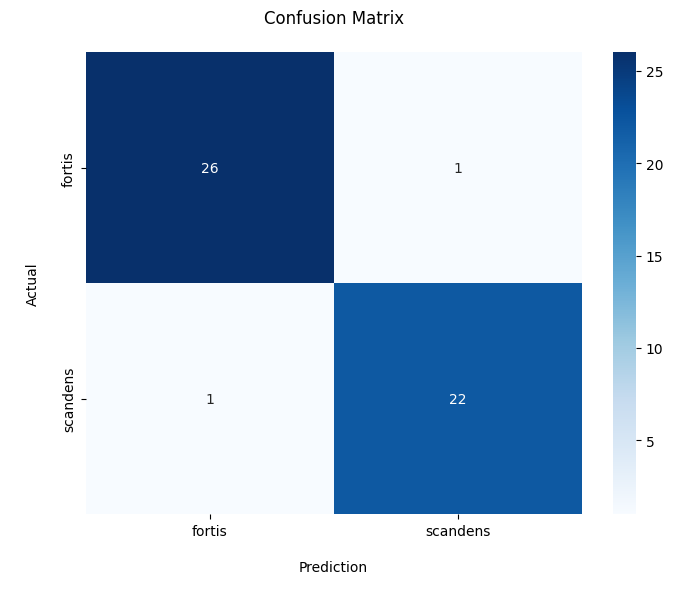

In [45]:
# Proceed to plot the confusion matrix

import seaborn as sns
# Display the confusion matrix of the 'mlp' classification model using the 'confusion_matrix' method
# Use 'y_test' and 'y_pred' as arguments for the 'confusion_matrix' function
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=mlp.classes_,
            yticklabels=mlp.classes_)
plt.xlabel('\nPrediction\n')
plt.ylabel('\nActual\n')
plt.title('Confusion Matrix\n')
plt.show()

In [46]:
# Print the classification report to evaluate the model's performance
# The report includes precision, recall, and F1-score for each class in the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      fortis       0.96      0.96      0.96        27
    scandens       0.96      0.96      0.96        23

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [47]:
# Create a new DataFrame for a finch with given beak length ('blength') and beak depth ('bdepth')
new_finch = pd.DataFrame([[10.0, 8.5]], columns=['blength', 'bdepth'])

# Use the trained MLP model to make a prediction for the new finch data
nueva_prediccion = mlp.predict(new_finch)

# Display the predicted species for the new finch based on the model
nueva_prediccion

array(['fortis'], dtype='<U8')